# Wine quality analysis and prediction

Your task is to analyze the Wine quality dataset using techniques learned in the course and create a perceptron model to predict wine quality based on existing variables.

The notebook consists of two parts:

  1. Analyzing the data (summary statistics and graphical analysis)
  2. Creating a perceptron model.

### Data Description

The data we are using is modified [Wine Quality - Red Wine](https://archive.ics.uci.edu/ml/datasets/wine+quality) datasets taken from the UCI repository.

#### Red Wine Data

Information regarding data:
&emsp;&emsp;&emsp;&emsp;**Title:** Wine Quality<br>
&emsp;&emsp;&emsp;&emsp;**Number of Instances:** 1599<br>
&emsp;&emsp;&emsp;&emsp;**Number of Attributes:** 6<br>
&emsp;&emsp;&emsp;&emsp;**Attribute Information:**

    1. fixed acidity:           continuous
    2. volatile acidity:        continuous
    3. residual sugar:          continuous
    4. density:                 continuous
    5. alcohol:                 continuous
    6. quality:                 multi-valued discrete

### Variable Descriptions

Here is an explanation of each variable in the datasets:

1. **fixed acidity**: Refers to the non-volatile acids in wine such as tartaric acid. It contributes to the wine's tartness.
2. **volatile acidity**: Measures the amount of acetic acid in wine, which at high levels can lead to an unpleasant vinegar taste.
3. **residual sugar**: The amount of sugar remaining after fermentation stops. It is measured in grams per liter and affects the sweetness of wine.
4. **density**: The density of wine, close to the density of water. It can be influenced by the presence of sugars, alcohol, and other compounds.
5. **alcohol**: The alcohol content of the wine, usually measured as a percentage of volume.
6. **quality**: A score between 0 and 10 given by wine experts based on sensory data, representing the overall quality of the wine. Based on these scores, `bad wine` is assigned to wines with a score < 7 and `good wine` to wines with a score ≥ 7.


### Tasks

1. Load CSV data into a pandas DataFrame.
2. Explore data:
   * Specify which variables are numerical and which are categorical variables.
   * Calculate the number of unique values for each variable.
   * Detect missing values (`NaN` values).
   * Detect duplicated rows.
3. If there are any `NaN` values, filter them out.
4. If there are any duplicated rows, filter them out.


### Hints

1. A useful method for the description of data types is `.info()`.


In [1]:
# import all necessary libraries
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score

We will first import the data into a pandas dataframe and inspect it's properties.

In [2]:
# Load the dataset from Github into pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Evadacunha/Competition_ELLS2024/main/wine_quality.csv')

# Display the first few rows of the dataset
print("-----Display the first few rows of the dataset")
print(df.head())

#Gives information on different variables
print("\n-----General information on the dataset:")
print(df.info())
#No NaN values

#Check missing values -> no null values
print("\n-----Amount of missing values.")
print(df.isnull().sum())

#Check duplicated rows -> 243 duplicated rows, so we need to remove them
print("\n-----Amount of duplicated rows.")
print(df.duplicated().sum())
print("-----Duplicates have been removed.")
df=df.drop_duplicates()
print(df.duplicated().sum())

# In this dataset, 'quality' is considered as a categorical variable
print("\n-----There is only one categorical variable: quality of wine. This has two possible values: good wine or bad wine. The other 5 variables are numerical.")
categorical_vars = df['quality'] #save column separately as an array
print(categorical_vars.unique())
print("\n-----There are 5 numerical variables.")
print(df.columns.values[:4])

#Find the amount of unique values
print("\n-----Amount of unique values for example variable alcohol.")
print(len(df["alcohol"].unique()))




-----Display the first few rows of the dataset
   fixed acidity  volatile acidity  residual sugar  density  alcohol   quality
0            7.4              0.70             1.9   0.9978      9.4  bad wine
1            7.8              0.88             2.6   0.9968      9.8  bad wine
2            7.8              0.76             2.3   0.9970      9.8  bad wine
3           11.2              0.28             1.9   0.9980      9.8  bad wine
4            7.4              0.70             1.9   0.9978      9.4  bad wine

-----General information on the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     1599 non-null   float64
 1   volatile acidity  1599 non-null   float64
 2   residual sugar    1599 non-null   float64
 3   density           1599 non-null   float64
 4   alcohol           1599 non-null   float64
 5


-----Summary statistics for categorical variables:
count         1356
unique           2
top       bad wine
freq          1173
Name: quality, dtype: object

-----Convert categorical variable to 0/1:
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

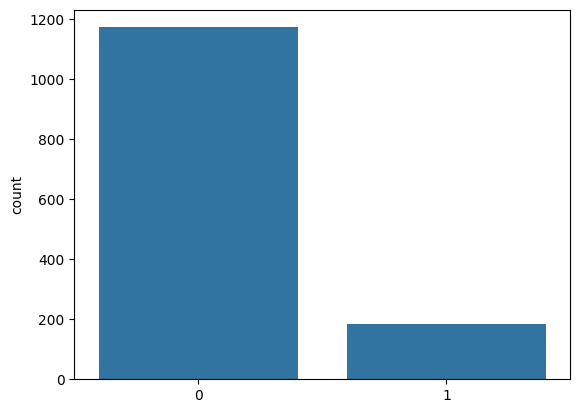


-----There is much more bad wine than good wine. Almost about 6x as much bad wine as good wine.


In [3]:
# Calculate summary statistics for categorical variables
print("\n-----Summary statistics for categorical variables:")
print(categorical_vars.describe())

# Create count plot for categorical variables
print("\n-----Convert categorical variable to 0/1:")
var=list()
for element in categorical_vars:
  if element=="bad wine":
    var.append(0)
  elif element=="good wine":
    var.append(1)
print(var)

print("\n-----Count plot for categorical variables:")
sns.countplot(x=var, data=df)
plt.show()
print("\n-----There is much more bad wine than good wine. Almost about 6x as much bad wine as good wine.")

# Analysis of variables

Analyze the categorical and numerical variables separately.

## Analysis on Numerical Attributes

### Tasks

1. Subset the dataset only for the numerical variables.
2. Calculate summary statistics for these variables:
   * min
   * max
   * mean
   * median
   * variance
   * standard deviation
3. Create graphical analysis of the numeric variables:
   * Create one (or more) of the following plots for each numeric variable:
      * Histogram (`sns.histplot()`)
      * Box plot (`sns.boxplot()`)
      * Violin plot (`sns.violinplot()`)
4. Analyze the relationships between individual numerical variables:
   * Use `sns.pairplot()`.
5. Describe the insights from the analysis:
   * Describe the distribution of individual numeric variables.
   * Are there any relationships between the numeric variables?
     * For example: If the alcohol increases, does the fixed acidity increase/decrease?


### Hints

1. A useful method for the summary statistics is `.describe()` from the pandas package.


In [4]:
# Calculate statistics for wine
wine_stats = df.describe()
print("\n-----Summary of statistics for all numerical wine variables.")
print(wine_stats)
# Calculate median for wine

wine_variance = df.iloc[:,0:4].var()
print("\n-----Variance for all numerical wine variables.")
print(wine_variance)



-----Summary of statistics for all numerical wine variables.
       fixed acidity  volatile acidity  residual sugar      density  \
count    1356.000000       1356.000000     1356.000000  1356.000000   
mean        8.310103          0.529845        2.517183     0.996710   
std         1.737452          0.183050        1.342207     0.001868   
min         4.600000          0.120000        0.900000     0.990070   
25%         7.100000          0.390000        1.900000     0.995600   
50%         7.900000          0.520000        2.200000     0.996700   
75%         9.200000          0.640000        2.600000     0.997820   
max        15.900000          1.580000       15.500000     1.003690   

           alcohol  
count  1356.000000  
mean     10.431649  
std       1.081709  
min       8.400000  
25%       9.500000  
50%      10.200000  
75%      11.100000  
max      14.900000  

-----Variance for all numerical wine variables.
fixed acidity       3.018739
volatile acidity    0.033507
re

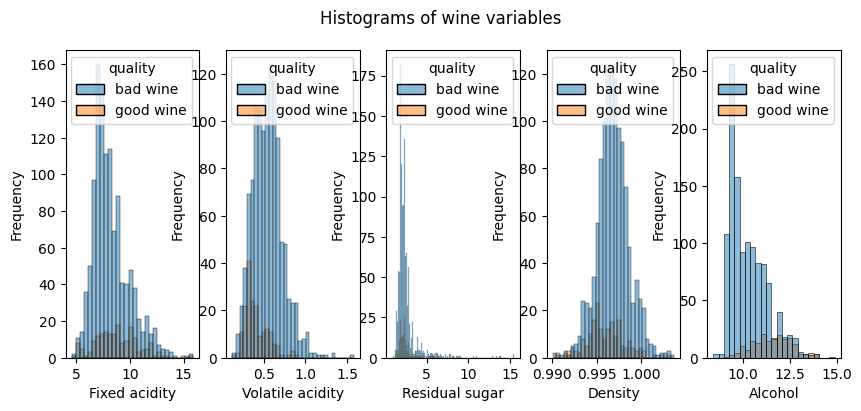


 -----Analysis of the histograms:


In [5]:
# Distribution plot for fixed acidity
plt.figure(figsize=(10, 4))
plt.subplot(1, 5, 1)
sns.histplot(df,x='fixed acidity',hue='quality')
plt.xlabel('Fixed acidity')
plt.ylabel('Frequency')

# Distribution plot for volatile acidity
plt.subplot(1, 5, 2)
sns.histplot(df,x='volatile acidity',hue='quality')
plt.xlabel('Volatile acidity')
plt.ylabel('Frequency')


# Distribution plot for residual sugar
plt.subplot(1, 5, 3)
sns.histplot(df,x='residual sugar',hue='quality')
plt.xlabel('Residual sugar')
plt.ylabel('Frequency')

# Distribution plot for density
plt.subplot(1, 5, 4)
sns.histplot(df,x='density',hue='quality')
plt.xlabel('Density')
plt.ylabel('Frequency')

# Distribution plot for alcohol
plt.subplot(1, 5, 5)
sns.histplot(df,x='alcohol',hue='quality')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.suptitle('Histograms of wine variables')
plt.show()
print("\n -----Analysis of the histograms:")



Most of the variables don't have a good normal distribution. The density of bad wine and residual sugar content of good wine seem to have a Gaussian distribution.
The other variables of the bad wine type are skewed to the right. The distributions of the good wine are less clear.

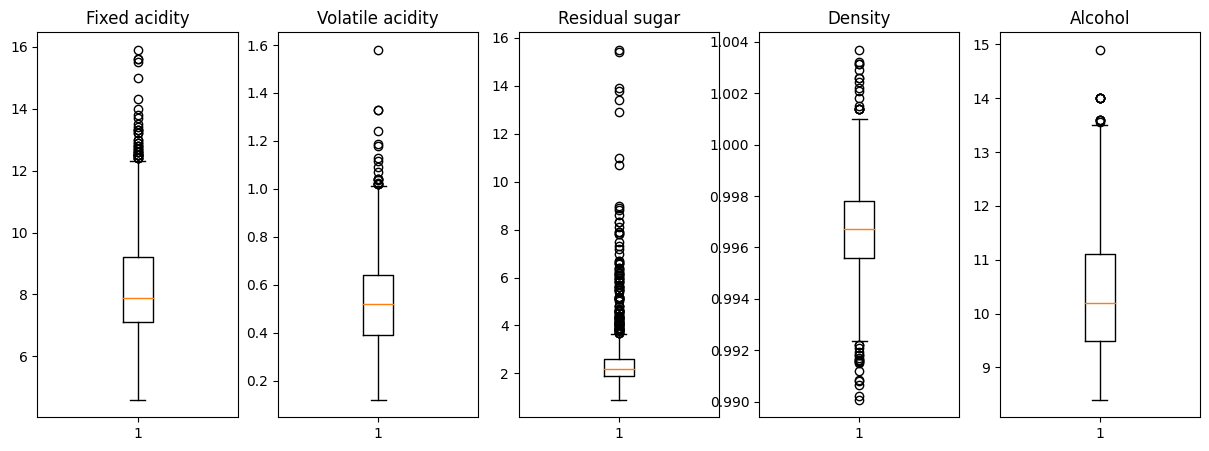


 -----Analysis of the boxplots:


In [6]:
fig, axs = plt.subplots(1,5,figsize=(15,5))
axs[0].boxplot(df.iloc[:,0])
axs[0].set_title('Fixed acidity')
axs[1].boxplot(df.iloc[:,1])
axs[1].set_title('Volatile acidity')
axs[2].boxplot(df.iloc[:,2])
axs[2].set_title('Residual sugar')
axs[3].boxplot(df.iloc[:,3])
axs[3].set_title('Density')
axs[4].boxplot(df.iloc[:,4])
axs[4].set_title('Alcohol')
plt.show()
print("\n -----Analysis of the boxplots:")


There are a lot of outliers present in all variables, except for alcohol content. Fixed acidity, volatile acidity, residual sugars, alcohol all have outliers to the high side, while density has outliers in both directions. The residual sugar content is usually in a small range, but the outliers deviate from this on a very big scale.

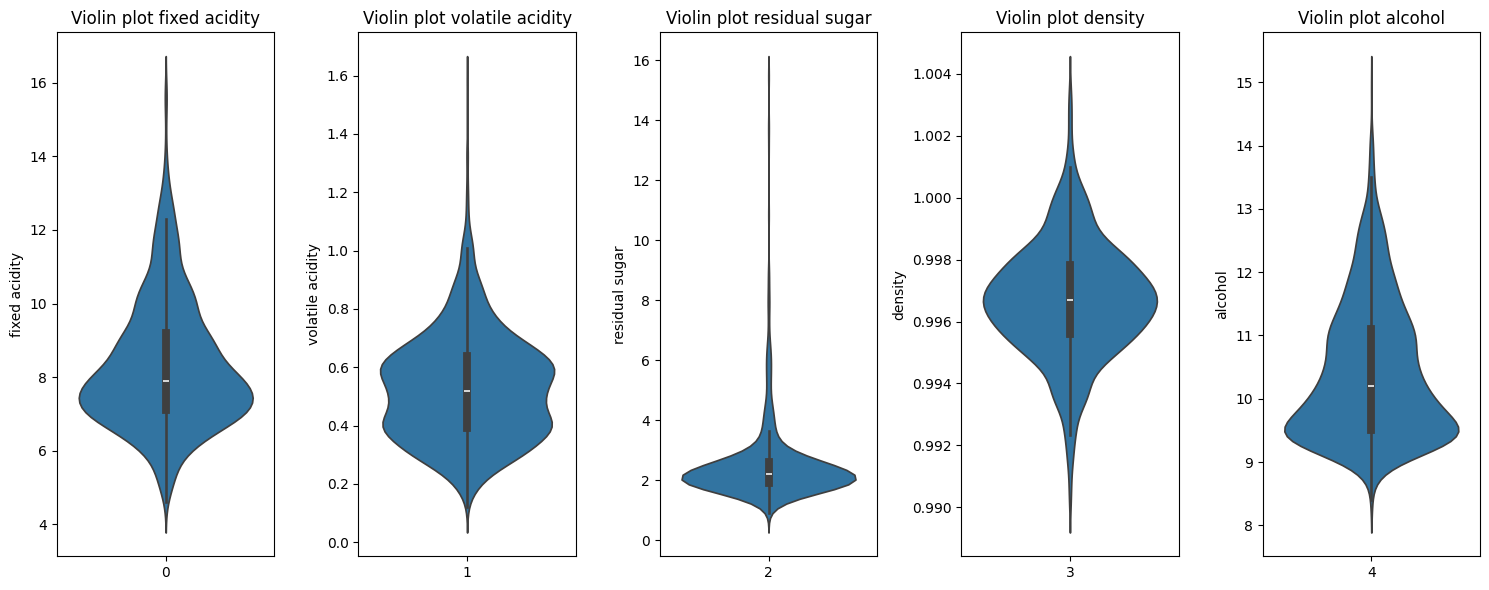


 -----Analysis of the violin plots:


In [7]:
fig, axes = plt.subplots(1, 5, figsize=(15, 6))

# First subplot
sns.violinplot(data=df, x=0, y='fixed acidity', ax=axes[0])
axes[0].set_title('Violin plot fixed acidity')
sns.violinplot(data=df, x=1, y='volatile acidity', ax=axes[1])
axes[1].set_title('Violin plot volatile acidity')
sns.violinplot(data=df, x=2, y='residual sugar', ax=axes[2])
axes[2].set_title('Violin plot residual sugar')
sns.violinplot(data=df, x=3, y='density', ax=axes[3])
axes[3].set_title('Violin plot density')
sns.violinplot(data=df, x=4, y='alcohol', ax=axes[4])
axes[4].set_title('Violin plot alcohol')

plt.tight_layout()
plt.show()
print("\n -----Analysis of the violin plots:")


The violin plots of volatile acidity, residual sugar and density are symmetric along the horizontal axis for the bulk of the samples. Fixed acidity and alcohol content are more centered around lower values. The long tails (outliers) for higher values are clearly visible for fixed acidity, volatile acidity, residual sugars and alcohol as described previously on the part about boxplots.

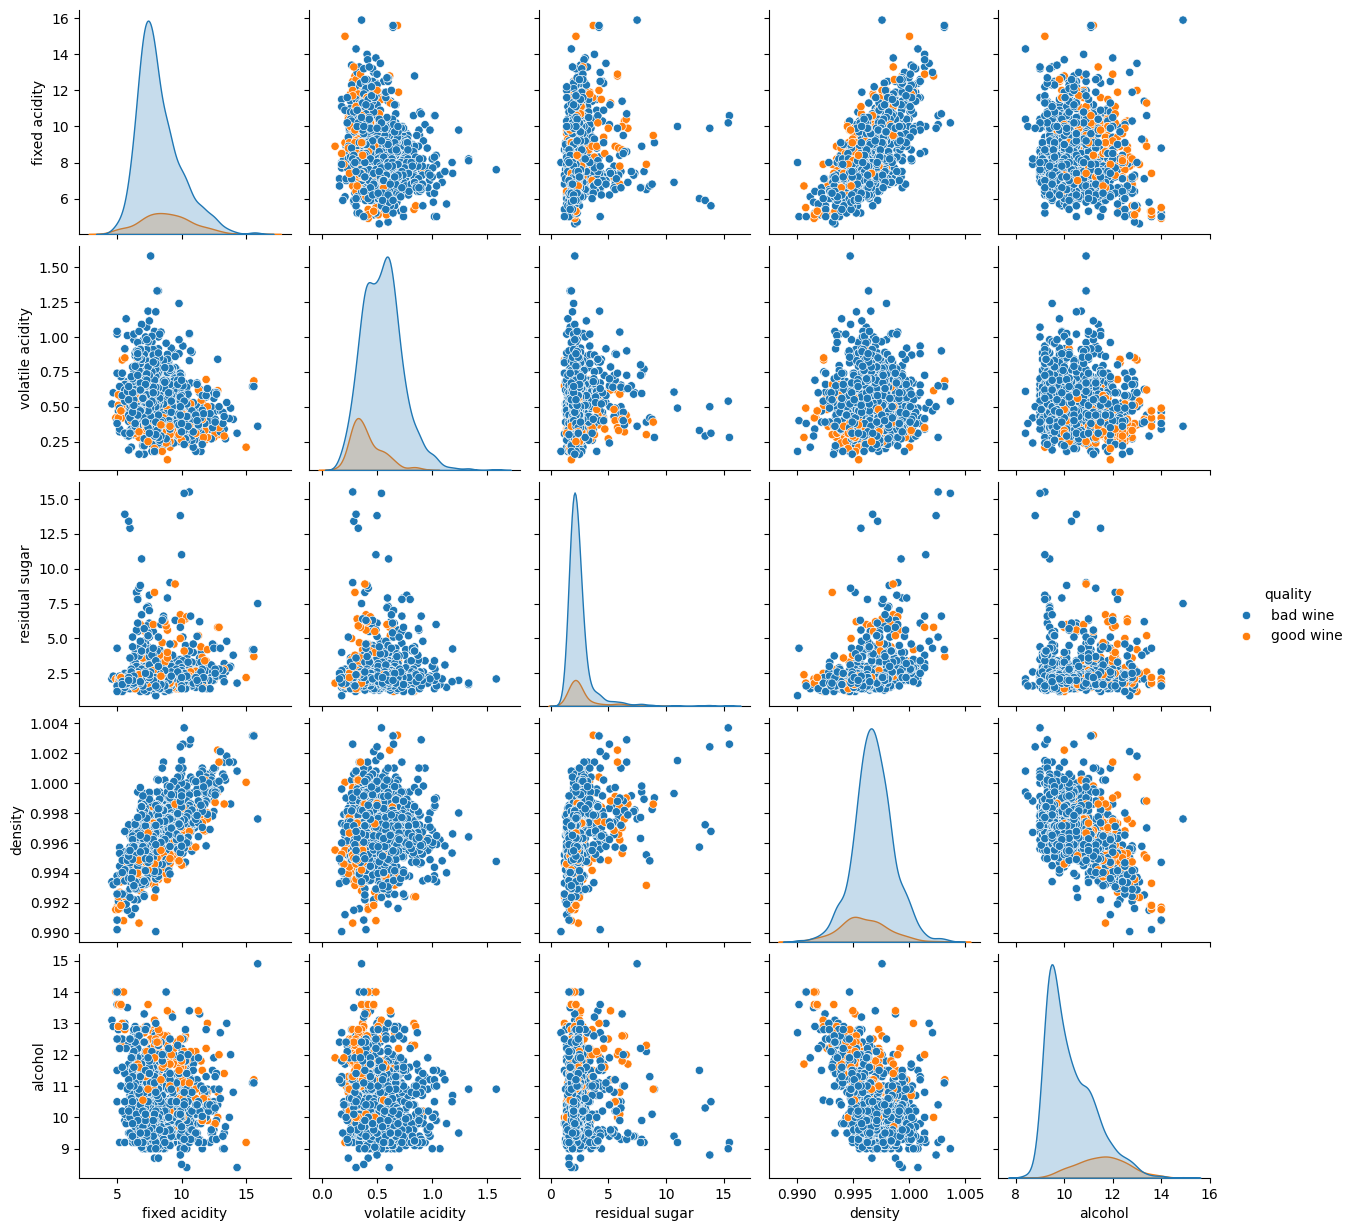


 -----Analysis of the pair plot:


In [8]:
sns.pairplot(data=df, hue='quality')
plt.show()
print("\n -----Analysis of the pair plot:")

On the diagonal axis, we can see the histograms as before, in a slightly different representation. There are some plots that seem to contain some kind of correlation.
- Fixed acidity and density seem to have a positive correlation, both for good and bad wine.
- Alcohol and density seem to have a negative correlation, both for good and bad wine.
- On the row of the volatile acidity, it seems that the bad wines usually have higher values (independent of the other variable), while good wines have lower values of volatile acidity. The same trend can be seen on the volatile acid plot on the diagonal line. Where the highest frequency for bad wine is at higher volatily values than for good wine.
- Similarly, good wine seems to have higher percentages of alcohol as seen on the diagonal.



## Analysis of categorical vs. numerical variables

### Tasks

1. Work with the original dataset (containing both categorical and numeric variables).
2. Explore the relationship between categorical variables and numeric variables:
   * Create box plots of categorical vs. numerical variables for each variable (use `sns.boxenplot()`).
3. (Optional) Create a violin plot of categorical vs. numerical variables for each variable (use `sns.violinplot()`).
4. Create a line plot of `quality` vs. individual numerical variables.
5. Describe what you found from the plots in tasks 2, 3, and 4.


# Prediction model

In this section, you are going to train the perceptron model.

The dataset is going to be split into two parts:
1. **Train dataset** - This is the dataset on which the model is going to be trained.
2. **Test dataset** - This is the set of data which the model 'has not seen yet' and it is used to test how well the model predicts wine `quality` with new data.

The splitting is done randomly assigning data to Train and Test datasets. The split is as follows:
1. 80% is assigned to the Train dataset.
2. 20% is assigned to the Test dataset.

On each iteration, Accuracy Score is calculated.

**Accuracy Score** is defined as the ratio of the number of correct predictions to the total number of predictions made.

Mathematically, it is given by:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

So if the accuracy is 1, this means that the model predicts the values exactly. In reality, accuracy = 1 is not achievable, so our goal is to have accuracy as high as possible.

## Dependent variable imbalance

We also need to handle the imbalanced dependent variable `quality` using the **Synthetic Minority Over-sampling Technique** (SMOTE).

Imbalanced datasets occur when the number of instances in one class significantly outnumbers the instances in another class. This imbalance can lead to biased models that perform poorly on the smaller class. To address this issue, we use SMOTE to oversample (generate synthetic observations) the smaller class.

**SMOTE** works by generating synthetic examples for the smaller class. It does this by selecting an instance from the smaller class and finding its k-nearest neighbors (5 closest observations). New synthetic example is then created which is similar to it's neighbors.



-----Define the independent variables (X).
      fixed acidity  volatile acidity  residual sugar  density
0               7.4             0.700             1.9  0.99780
1               7.8             0.880             2.6  0.99680
2               7.8             0.760             2.3  0.99700
3              11.2             0.280             1.9  0.99800
5               7.4             0.660             1.8  0.99780
...             ...               ...             ...      ...
1593            6.8             0.620             1.9  0.99651
1594            6.2             0.600             2.0  0.99490
1595            5.9             0.550             2.2  0.99512
1597            5.9             0.645             2.0  0.99547
1598            6.0             0.310             3.6  0.99549

[1356 rows x 4 columns]

-----Define the independent variable (Y).
0       bad wine
1       bad wine
2       bad wine
3       bad wine
5       bad wine
          ...   
1593    bad wine
1594    bad w

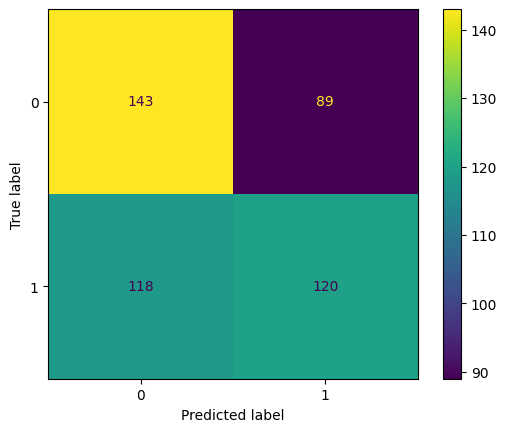

In [9]:
print("\n-----Define the independent variables (X).")
X=df.iloc[:,0:4]
print(X)
print("\n-----Define the independent variable (Y).")
Y_original=df.iloc[:,5]
print(Y_original)

# Create count plot for categorical variables
print("\n-----Convert categorical variable to 0/1:")
Y=[]
for element in Y_original:
  if element=="bad wine":
    Y.append(0)
  elif element=="good wine":
    Y.append(1)
print(var)
Y=pd.Series(Y)

print("\n-----Invisible part of code will now solve the imbalance between the amount of good and bad wine samples.")
from imblearn.over_sampling import SMOTE
# Initialize SMOTE with 5 nearest neighbors
oversample = SMOTE(k_neighbors=5)
# Fit and resample the dataset
X_ros, Y_ros = oversample.fit_resample(X, Y)
print("-----New sizes of X and Y matrix:")
print(len(X_ros))
print(len(Y_ros))

from sklearn.model_selection import train_test_split

# Create Train-Test split
print("\n-----Check the size of training and testing data:")
X_train, X_test, Y_train, Y_test = train_test_split(X_ros, Y_ros, test_size=0.2, random_state=0)
print(f"size of X = {X_ros.shape}")
print(f"size of X_train = {X_train.shape}")
print(f"size of X_test = {X_test.shape}")
print(f"size of y = {Y_ros.shape}")
print(f"size of y_train = {Y_train.shape}")
print(f"size of y_test = {Y_test.shape}")

#Standardizing data
print("\n-----Standardize the train and test data:")
scaler= StandardScaler()
scale = scaler.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

#Perceptron
from sklearn.linear_model import Perceptron

# Create a perceptron classifier - instance of object, part of library
learning_rate=0.4
epoch_num=1000
clf = Perceptron(eta0=learning_rate, max_iter=epoch_num)

# Train the perceptron classifier
clf.fit(X_train, Y_train)

# Predict on the test data
Y_pred = clf.predict(X_test)

# Calculate accuracy
result=accuracy_score(Y_test, Y_pred)
print(result)

#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

conf_matrix = confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

cm_display.plot()
plt.show()




### Tasks

Create a perceptron based on the variables in the dataset for prediction of `quality` based on all other variables.

1. Separate the dependent and independent variables:
   * Name the independent variables dataframe `X`.
   * Name the dependent variable `y`.
2. Convert any categorical variable to `int`.
3. In the analysis of the categorical variable, we found out that the `quality` variable is highly imbalanced. Use the following code to alleviate the issue:


  4. Create a Train-Test split of the data with the Test dataset being 20% of the data.




5. Preprocess the independent variables dataset (both Train and Test).

6. Fit the perceptron model to the Train data and evaluate the accuracy on the Test data.
  * Initialize it with learning rate saved to `learning_rate` variable and the number of epochs into `epoch_num`.


## Testing model accuracy

## DO NOT MODIFY THIS CODE!!!

Just uncomment the code and run it after you are finished with the previous sections.


In this section, the model you trained above is going to be evaluated using repeated random Train-Test dataset splitting.

The splitting is done 1000 times, randomly assigning data to Train and Test datasets. The split is as follows:
1. 80% is assigned to the Train dataset.
2. 20% is assigned to the Test dataset.

On each iteration, Accuracy Score is calculated.



### Tasks

Run the code below and describe the results.

How good is our model for the prediction of `quality` based on other variables?
i.e. How accurate is your model in predicting the `quality`?


### Hints

It is crucial to name the independent variables dataset as `X_ros` and the dependent variable as `y_ros` after aplication of SMOTE  and learning rate into `learning_rate` and number of epochs into`epoch_num`f or the code below to function.


Min. Accuracy Score: 0.4297872340425532
Max. Accuracy Score: 0.5702127659574469
Mean Accuracy Score: 0.4991063829787234
Median Accuracy Score: 0.5


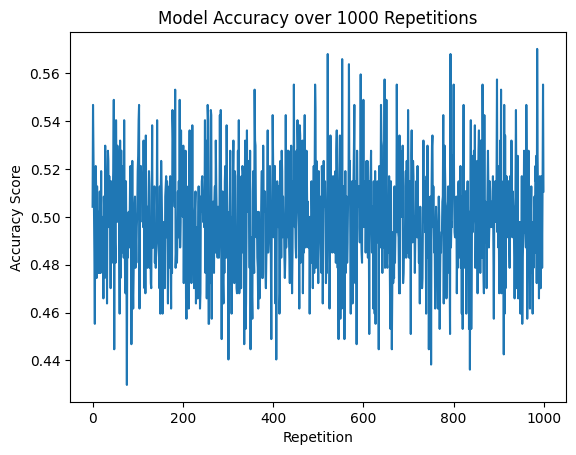

In [11]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Store accuracy scores
accuracy_scores = []

# Repeated train-test split
for repetition in range(epoch_num):
    # Split the dataset into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_ros, Y_ros, test_size=0.2, random_state=5 + repetition)

    # Create a perceptron classifier
    clf = Perceptron(eta0=learning_rate, max_iter=epoch_num, random_state=5)  # eta0 is learning rate
    # Train the perceptron classifier
    clf.fit(X_train, Y_train)

    # Predict on the test data
    y_pred = clf.predict(X_test)

    # Calculate accuracy score on the testing set
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)

# Print the results
print("Min. Accuracy Score:", min(accuracy_scores))
print("Max. Accuracy Score:", max(accuracy_scores))
print("Mean Accuracy Score:", statistics.mean(accuracy_scores))
print("Median Accuracy Score:", statistics.median(accuracy_scores))

# Plot the accuracy scores
plt.plot(range(epoch_num), accuracy_scores)
plt.xlabel('Repetition')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy over 1000 Repetitions')
plt.show()
